In [1]:
import cv2
import json
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_dataset_info(json_path):
    """
    Load dataset information from JSON file
    """
    with open(json_path, 'r') as f:
        return json.load(f)

In [4]:
json_path = "C:/Users/rahul/OneDrive/Desktop/Object Recognition Dataset-20241106T095351Z-001/Object Recognition Dataset/instances_val2017.json/instances_val2017.json"  # Adjust path as needed
try:
    dataset_info = load_dataset_info(json_path)
    print("Successfully loaded JSON file")
except Exception as e:
    print(f"Error loading JSON: {e}")

Successfully loaded JSON file


In [5]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    """
    Load and preprocess a single image
    """
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not load image at {image_path}")
    
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display original image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    
    # Resize image
    resized_image = cv2.resize(image_rgb, target_size, interpolation=cv2.INTER_AREA)
    
    # Display resized image
    plt.subplot(1, 2, 2)
    plt.imshow(resized_image)
    plt.title(f'Resized to {target_size}')
    plt.show()
    
    # Normalize pixel values
    normalized_image = resized_image / 255.0
    
    return normalized_image, image_rgb

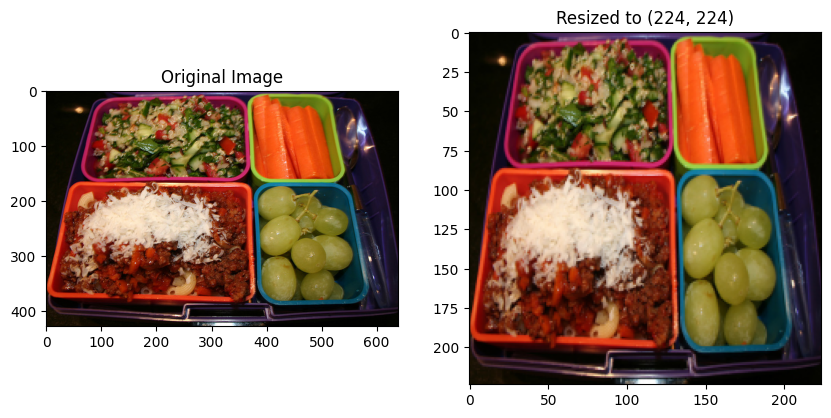

Successfully processed image


In [6]:
sample_image_path = "C:/Users/rahul/OneDrive/Desktop/000000015254.jpg"  # Adjust path to one of your images
try:
    processed_image, original_rgb = load_and_preprocess_image(sample_image_path)
    print("Successfully processed image")
except Exception as e:
    print(f"Error processing image: {e}")

In [7]:
def basic_image_analysis(image):
    """
    Perform basic image analysis and display results
    """
    # Calculate basic statistics
    mean_brightness = np.mean(image)
    std_brightness = np.std(image)
    
    # Create subplots
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Original Image')
    
    # Plot 2: Histogram
    plt.subplot(1, 3, 2)
    for i, color in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title('Color Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    # Plot 3: Edge Detection
    plt.subplot(1, 3, 3)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    
    plt.show()
    
    return {
        'mean_brightness': mean_brightness,
        'std_brightness': std_brightness,
        'edges': edges
    }


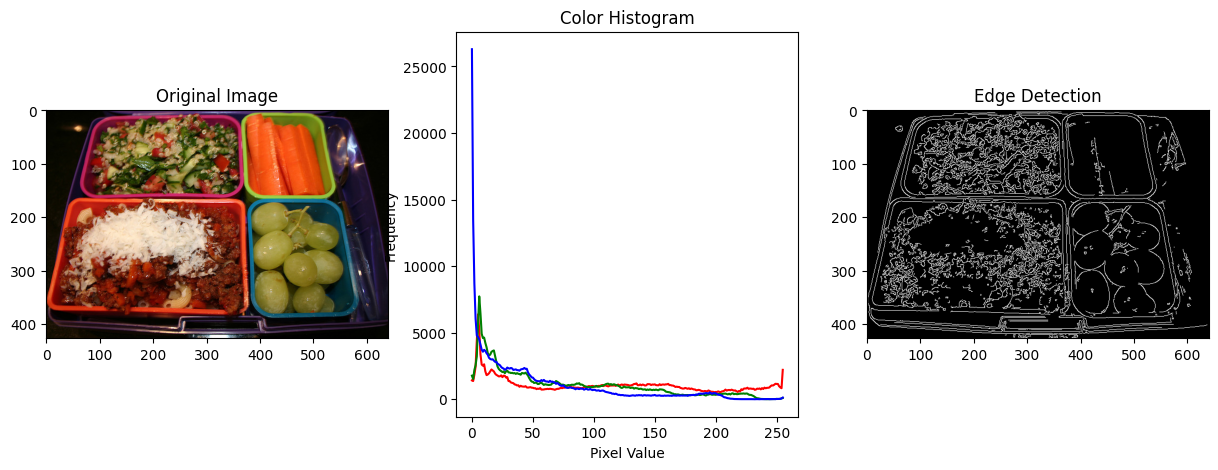


Analysis Results:
Mean Brightness: 74.37
Brightness Std Dev: 69.48


In [8]:
try:
    analysis_results = basic_image_analysis(original_rgb)
    print("\nAnalysis Results:")
    print(f"Mean Brightness: {analysis_results['mean_brightness']:.2f}")
    print(f"Brightness Std Dev: {analysis_results['std_brightness']:.2f}")
except Exception as e:
    print(f"Error in analysis: {e}")

In [9]:
def display_image_info(image_path):
    """
    Display basic information about an image
    """
    image = cv2.imread(image_path)
    if image is None:
        return None
    
    info = {
        'height': image.shape[0],
        'width': image.shape[1],
        'channels': image.shape[2],
        'size_kb': os.path.getsize(image_path) / 1024
    }
    
    # Print information in a formatted way
    print("\nImage Information:")
    for key, value in info.items():
        print(f"{key}: {value}")
    
    return info


In [10]:
info = display_image_info(sample_image_path)



Image Information:
height: 427
width: 640
channels: 3
size_kb: 118.00390625
